# Simple iteration for systems of linear equations

First, generate a random diagonally dominant matrix, for testing.

In [1]:
import numpy as np
rndm = np.random.RandomState(1234)

n = 10
A = rndm.uniform(size=(n, n)) + np.diagflat([15]*n)
b = rndm.uniform(size=n)

# I.  Jacobi iteration

Given

$$
A x = b
$$

separate the diagonal part $D$,

$$ A = D + (A - D) $$

and write

$$
x = D^{-1} (D - A) x + D^{-1} b\;.
$$

Then iterate

$$
x_{n + 1} = B x_{n} + c\;,
$$

where 

$$
B = D^{-1} (D - A) \qquad \text{and} \qquad c = D^{-1} b
$$


Let's construct the matrix and the r.h.s. for the Jacobi iteration

In [2]:
diag_1d = np.diag(A)

B = -A.copy()
np.fill_diagonal(B, 0)

D = np.diag(diag_1d)
invD = np.diag(1./diag_1d)
BB = invD @ B 
c = invD @ b

In [3]:
# sanity checks
from numpy.testing import assert_allclose

assert_allclose(-B + D, A)


# xx is a "ground truth" solution, compute it using a direct method
xx = np.linalg.solve(A, b)

np.testing.assert_allclose(A@xx, b)
np.testing.assert_allclose(D@xx, B@xx + b)
np.testing.assert_allclose(xx, BB@xx + c)

Check that $\| B\| \leqslant 1$:

In [4]:
np.linalg.norm(BB)

0.36436161983015336

### Do the Jacobi iteration

In [5]:
n_iter = 50

x0 = np.ones(n)
x = x0
for _ in range(n_iter):
    x = BB @ x + c

In [6]:
# Check the result:

A @ x - b

array([ 1.11022302e-16,  0.00000000e+00, -2.22044605e-16, -1.11022302e-16,
        1.11022302e-16,  0.00000000e+00, -2.08166817e-17,  0.00000000e+00,
       -2.77555756e-17,  1.11022302e-16])

### Task I.1

Collect the proof-of-concept above into a single function implementing the Jacobi iteration. This function should receive the r.h.s. matrix $A$, the l.h.s. vector `b`, and the number of iterations to perform.


The matrix $A$ in the illustration above is strongly diagonally dominant, by construction. 
What happens if the diagonal matrix elements of $A$ are made smaller? Check the convergence of the Jacobi iteration, and check the value of the norm of $B$.

(20% of the total grade)


In [7]:
def jacobi_iteration(A, b, n_of_iter):
    #
    diag_1d = np.diag(A)

    B = -A.copy()
    np.fill_diagonal(B, 0)

    D = np.diag(diag_1d)
    invD = np.diag(1./diag_1d)
    BB = invD @ B 
    c = invD @ b
    #
    normB = np.linalg.norm(BB)
    print(f'The value of norm matrix B is = {normB}')
    #
    n = A.shape[1]
    x0 = np.ones(n)
    x = x0
    for i in range(n_of_iter):
        x = BB @ x + c
    AxminusB_Norm = np.linalg.norm(A@x - b)
    convg = 'no'
    if(AxminusB_Norm < 1e-3):  
        convg = 'yes'
    print(f'convergence? {convg}' )
    
    return x, normB, AxminusB_Norm

with diagonal addition = 0
The value of norm matrix B is = 11.66968152533123
convergence? no
with diagonal addition = 1
The value of norm matrix B is = 3.4341680304660547
convergence? no
with diagonal addition = 2
The value of norm matrix B is = 2.500651625856731
convergence? no
with diagonal addition = 3
The value of norm matrix B is = 1.4878523450535812
convergence? no
with diagonal addition = 4
The value of norm matrix B is = 1.2277037937745938
convergence? no
with diagonal addition = 5
The value of norm matrix B is = 1.0312222654332917
convergence? no
with diagonal addition = 6
The value of norm matrix B is = 0.8161762411265823
convergence? yes
with diagonal addition = 7
The value of norm matrix B is = 0.7502055628597474
convergence? yes
with diagonal addition = 8
The value of norm matrix B is = 0.6460172546076037
convergence? yes
with diagonal addition = 9
The value of norm matrix B is = 0.5125806387508098
convergence? yes
with diagonal addition = 10
The value of norm matrix B is 

[Text(0.5, 0, 'diagonal additions'), Text(0, 0.5, 'norm of Ax-b')]

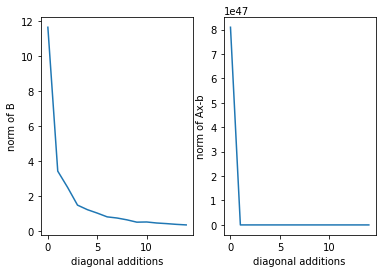

In [8]:
import matplotlib.pyplot as plt

n = 10
diagonal_addition = []
normBs = []
normAxminusBs = []
for i in range(n+5):
    print(f'with diagonal addition = {i}')
    A = rndm.uniform(size=(n, n)) + np.diagflat([i]*n)
    b = rndm.uniform(size=n)
    x, normB, normAxminusB= jacobi_iteration(A, b, 50)
    diagonal_addition.append(i)
    normBs.append(normB)
    normAxminusBs.append(normAxminusB)
_, axs = plt.subplots(1, 2)
axs[0].plot(diagonal_addition, normBs)
axs[0].set(xlabel='diagonal additions', ylabel='norm of B')
axs[1].plot(diagonal_addition, normAxminusBs)
axs[1].set(xlabel='diagonal additions', ylabel='norm of Ax-b')

# II. Seidel's iteration.

##### Task II.1

Implement the Seidel's iteration. 

Test it on a random matrix. Study the convergence of iterations, relate to the norm of the iteration matrix.

(30% of the total grade)

In [9]:
def seidel_iteration(A, b, n_of_iter):
    #########################
    m = A.shape[0]
    n = A.shape[1]
    ####
    x0 = np.ones(n)
    x = x0
    #
    for k in range(n_of_iter):
        ##
        for i in range(n):
            x[i] = (b[i] - A[i,0:i]@x[0:i] - A[i,i+1:]@x[i+1:])/A[i,i]
        #
        if(np.allclose(A@x-b, 0)):
            return x, k
        #
    return x, n_of_iter

Text(0, 0.5, 'number of iterations to convergence')

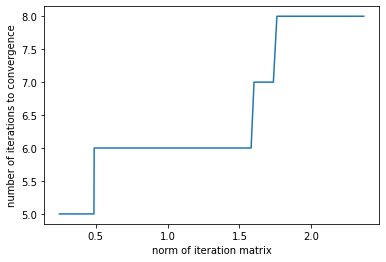

In [10]:

###############################
number_of_iterations_to_convergence = []
norm_of_iteration_matrix = []
for i in range(1000, 10000, 20):
    ##########################
    n = 10
    rndm = np.random.RandomState(12345)
    a1 = np.tril(rndm.uniform(size=(n,n)))*i
    a2 = rndm.uniform(size=(n,n))
    A = a2 + a1
    b = rndm.uniform(size=n)
    x, k = seidel_iteration(A, b, 50)
#     if(i == 25):
#         print(A@x - b)
#         print(k)
#         print('matin')
    ##########################
    #L*
    Lstar = np.tril(A)
    diag_1d = np.diag(A)
    D = np.diag(diag_1d)
    Ustar = np.triu(A)
    #U
    U = Ustar - D
    ####
    iterMatrix = np.linalg.inv(Lstar)@U
    normIterMatrix = np.linalg.norm(iterMatrix)
    ######################
    number_of_iterations_to_convergence.append(k)
    norm_of_iteration_matrix.append(normIterMatrix)

plt.plot(norm_of_iteration_matrix, number_of_iterations_to_convergence)
plt.xlabel('norm of iteration matrix')
plt.ylabel('number of iterations to convergence')

# III. Minimum residual scheme

### Task III.1

Implement the $\textit{minimum residual}$ scheme: an explicit non-stationary method, where at each step you select the iteration parameter $\tau_n$ to minimize the residual $\mathbf{r}_{n+1}$ given $\mathbf{r}_n$. Test it on a random matrix, study the convergence to the solution, in terms of the norm of the residual and the deviation from the ground truth solution (which you can obtain using a direct method). Study how the iteration parameter $\tau_n$ changes as iterations progress.

(50% of the grade)

In [11]:
def minimum_residual_scheme(A, b, n_of_iter):
    #########################
    m = A.shape[0]
    n = A.shape[1]
    ####
    x0 = np.ones(n)
    x = x0
    #
    rnorms, xSubXsol, ts= [], [], []
    #
    xsol = np.linalg.solve(A, b)
    for k in range(n_of_iter):
        xSubXsol.append(np.linalg.norm(x-xsol))
        r = A@x - b
        rnorms.append(np.linalg.norm(r))
        t = r@A@r / np.power(np.linalg.norm(A@r) , 2)
        ts.append(t)
        if(np.allclose(r, 0)):
            return x, k, xSubXsol, rnorms, ts
        x = x - t*r
        
        #
    return x, n_of_iter, xSubXsol, rnorms, ts

[ 0.03919429  0.03780037  0.04283232  0.02365951  0.05745031 -0.00030244
 -0.00577279  0.03177549 -0.00422849  0.05284648]
11


Text(0, 0.5, 'value of t')

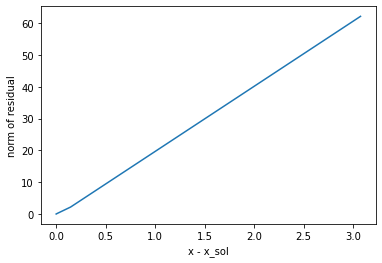

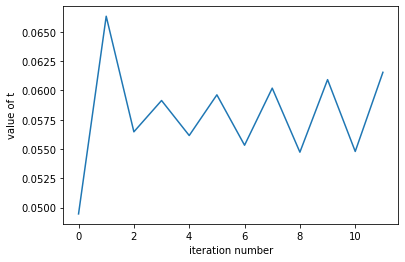

In [14]:
rndm = np.random.RandomState(1234)

n = 10
A = rndm.uniform(size=(n, n)) + np.diagflat([15]*n)
b = rndm.uniform(size=n)
x, k, xSubXsol, rnorms, ts = minimum_residual_scheme(A, b, 50)
print(x)
print(k)
plt.plot(xSubXsol, rnorms)
plt.xlabel('x - x_sol')
plt.ylabel('norm of residual')
plt.figure()
plt.plot(ts)
plt.xlabel('iteration number')
plt.ylabel('value of t')